In [28]:
import torch.nn as nn 
from DataLoader import DataLoader 
import torch.optim as optim
from Models import RotationNN
from utils import plot_image, line_image, rotate_images
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
image_size = 128
num_samples = 50
batch_size = 1 # pure SGD

loader = DataLoader(image_size, num_samples, batch_size)
model = RotationNN(image_size)
criterion = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.2) 

In [30]:
epochs = 1000
for epoch in range(epochs):
    for x, _ in loader:
        y = rotate_images(x)
        y_pred = model(x)
    
        loss = criterion(y_pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.2314
Epoch [200/1000], Loss: 0.2306
Epoch [300/1000], Loss: 0.2284
Epoch [400/1000], Loss: 0.2298
Epoch [500/1000], Loss: 0.2300
Epoch [600/1000], Loss: 0.2301
Epoch [700/1000], Loss: 0.2291
Epoch [800/1000], Loss: 0.2280
Epoch [900/1000], Loss: 0.2299
Epoch [1000/1000], Loss: 0.2306


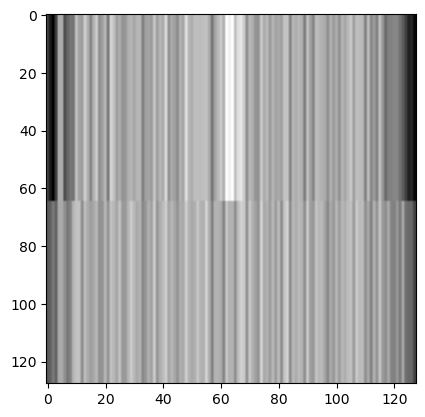

In [31]:
# testing
line = line_image(image_size)
plot_image(model(line))